In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/df.csv')

In [3]:
na_count = df.isnull().sum()
na_df = pd.DataFrame(na_count, columns=['na_count'])
na_df['na_prc'] = round(na_df['na_count'] / df.shape[0] * 100, 2)
na_df

,na_count,na_prc
date,0,0.00
puls,27,7.28
RR_skurczowe,98,26.42
RR_rozkurczowe,98,26.42
saturacja_prc,31,8.36
CVP_srednie,176,47.44
odd_wymuszane,12,3.23
odd_calkowite,30,8.09


In [4]:
df_idx = df.set_index('date')
x_ticks_locs = []
x_ticks_labels = []
days = df_idx.index.str[0:10]
for i, day in enumerate(days):
    if day not in x_ticks_labels:
        x_ticks_labels.append(day)
        x_ticks_locs.append(i)

In [5]:
# df_idx = df.set_index('date')
# df2 = df_idx.isnull()
# for param in df2.columns:
#     df3 = df2[param]
#     plt.plot(df3 * min(df[param]), alpha=0.5, label='missing')
#     plt.plot(df[param], marker='.', markersize=3, color='orange', label='known')
#     #locs, labels = plt.xticks()
#     plt.xticks(ticks=x_ticks_locs, labels=x_ticks_labels, rotation = 90)
#     plt.title(param + ' - missing values')
#     plt.legend(loc='upper right')
#     plt.show()

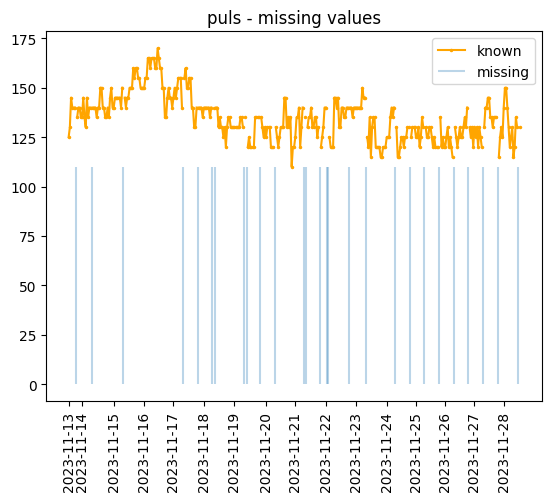

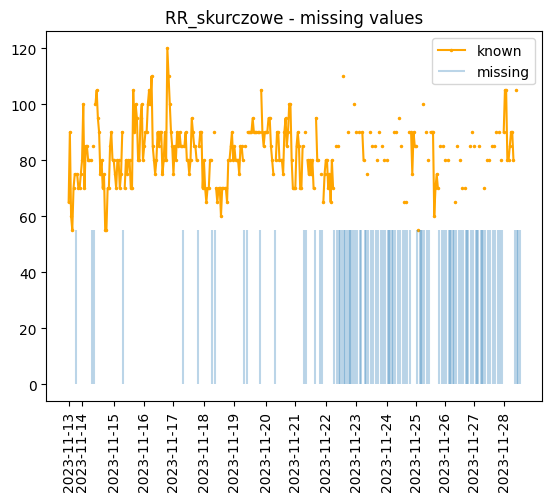

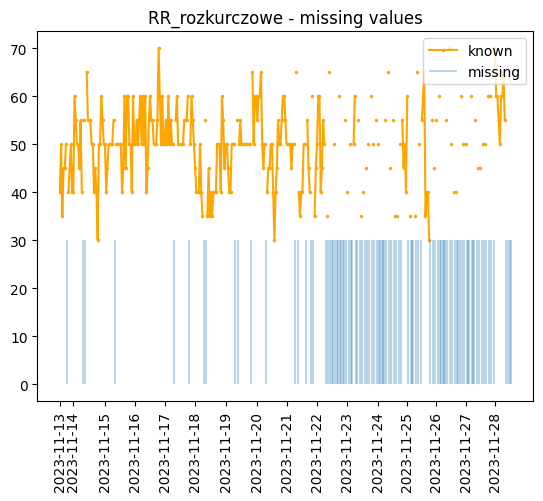

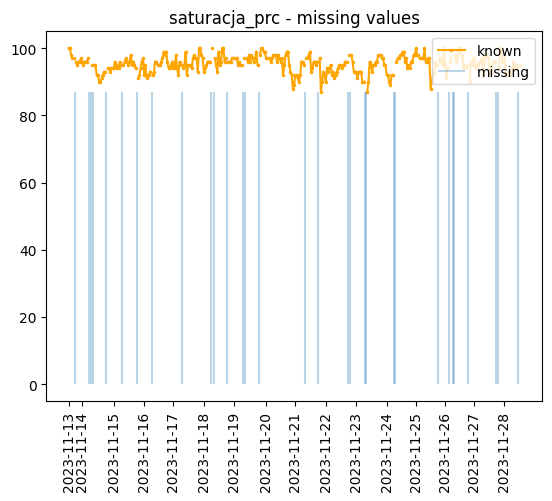

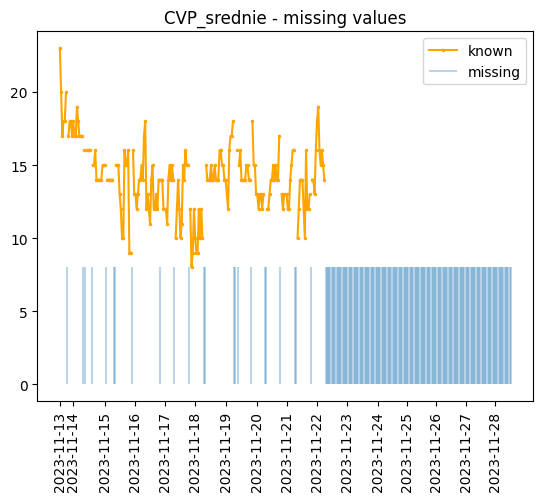

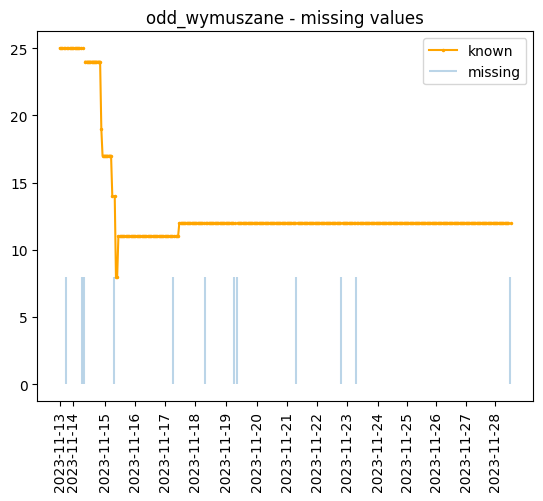

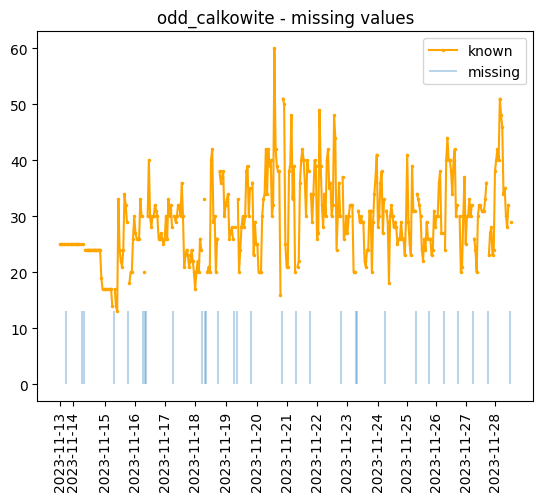

In [6]:
#better
for param in df_idx.columns:
    missing_values_loc = df_idx[param].isna()
    missing_values_dates = df_idx.index[missing_values_loc]
    
    plt.plot(df_idx.index, df_idx[param], marker='.', markersize=3, color='orange', label='known')

    plt.vlines(missing_values_dates,
               ymin=0,
               ymax=min(df_idx[param]),
               linestyle="-", alpha=.3, label = 'missing')
    
    plt.xticks(ticks=x_ticks_locs, labels=x_ticks_labels, rotation = 90)
    plt.title(param + ' - missing values')
    plt.legend(loc='upper right')
    plt.show()